In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('datasets/train.csv')
df.head()

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


## Exploration

In [3]:
print('Shape of data: ', df.shape)

# 146811 rows, 3 colums

Shape of data:  (146811, 3)


In [4]:
df.isnull().sum()

# there is no null values 

review_id    0
review       0
rating       0
dtype: int64

In [25]:
print('Rating types: ', df['rating'].unique())
print('Rating proportion:\n',df['rating'].value_counts())

Rating types:  [1 2 3 4 5]
Rating proportion:
 4    41865
5    41515
3    35941
1    14785
2    12705
Name: rating, dtype: int64


Text(0, 0.5, 'Count')

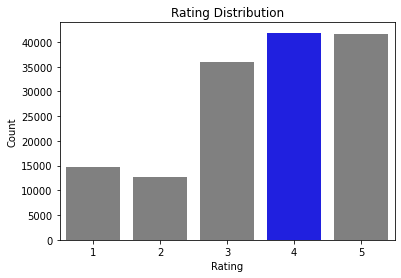

In [54]:
values = df['rating'].value_counts().sort_index()
idx = df['rating'].unique()
clrs = ['grey' if (x < max(values)) else 'blue' for x in values ]
ax = sns.barplot(x=idx, y=values, palette=clrs) # color=clrs)
ax.set_title('Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# people mostly give 4 rating

Text(0.5, 1.0, 'Number of characters present in each sentence')

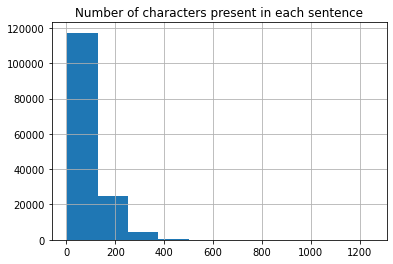

In [64]:
ax = df['review'].str.len().hist()
plt.title('Number of characters present in each sentence')

Array-nya gak mampu, kalau bisa di-run pakai laptop/PC yang memadai

In [95]:
# you have to run cleansing process first
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer()
#X = data['clean_text_stopwords']
#text_vec = vectorizer.fit_transform(X.values.astype('U'))
#word_count = pd.DataFrame(text_vec.toarray(), columns=vectorizer.get_feature_names())

In [96]:
#word_list = vectorizer.get_feature_names()
#count_list = text_vec.toarray().sum(axis=0) 
#word_freq = dict(zip(word_list,count_list))
#sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [ ]:
#from yellowbrick.text import FreqDistVisualizer
#visualizer = FreqDistVisualizer(features=word_list, orient='v')
#visualizer.fit(text_vec)
#visualizer.show()

## Cleansing

In [76]:
import string
import re

In [77]:
data = df[['review', 'rating']]
data.head()

,review,rating
0,Ga disappointed neat products .. Meletot Hilsn...,1
1,"Rdtanya replace broken glass, broken chargernya",1
2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,Sent a light blue suit goods ga want a refund,1
4,Pendants came with dents and scratches on its ...,1


In [78]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
data['clean_text']=data['review'].apply(lambda x: remove_punctuation(x))
data.head()

,review,rating,clean_text
0,Ga disappointed neat products .. Meletot Hilsn...,1,Ga disappointed neat products Meletot Hilsnya...
1,"Rdtanya replace broken glass, broken chargernya",1,Rdtanya replace broken glass broken chargernya
2,Nyesel bngt dsni shopping antecedent photo mes...,1,Nyesel bngt dsni shopping antecedent photo mes...
3,Sent a light blue suit goods ga want a refund,1,Sent a light blue suit goods ga want a refund
4,Pendants came with dents and scratches on its ...,1,Pendants came with dents and scratches on its ...


In [79]:
#remove hyperlink
data['clean_text'] = data['clean_text'].str.replace(r"http\S+", "") 
#remove emoji
data['clean_text'] = data['clean_text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
#convert all words to lowercase
data['clean_text'] = data['clean_text'].str.lower()
data.head()

C:\Users\laptop\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\laptop\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,review,rating,clean_text
0,Ga disappointed neat products .. Meletot Hilsn...,1,ga disappointed neat products meletot hilsnya...
1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass broken chargernya
2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel bngt dsni shopping antecedent photo mes...
3,Sent a light blue suit goods ga want a refund,1,sent a light blue suit goods ga want a refund
4,Pendants came with dents and scratches on its ...,1,pendants came with dents and scratches on its ...


In [80]:
# not my original code (spanyol code lol)
def recover_shortened_words(text):
  
    text = re.sub(r'\bapaa\b', 'apa', text)
    
    text = re.sub(r'\bbsk\b', 'besok', text)
    text = re.sub(r'\bbrngnya\b', 'barangnya', text)
    text = re.sub(r'\bbrp\b', 'berapa', text)
    text = re.sub(r'\bbgt\b', 'banget', text)
    text = re.sub(r'\bbngt\b', 'banget', text)
    text = re.sub(r'\bgini\b', 'begini', text)
    text = re.sub(r'\bbrg\b', 'barang', text)
    
    text = re.sub(r'\bdtg\b', 'datang', text)
    text = re.sub(r'\bd\b', 'di', text)
    text = re.sub(r'\bsdh\b', 'sudah', text)
    text = re.sub(r'\bdri\b', 'dari', text)
    text = re.sub(r'\bdsni\b', 'disini', text)
    
    text = re.sub(r'\bgk\b', 'gak', text)
    
    text = re.sub(r'\bhrs\b', 'harus', text)
    
    text = re.sub(r'\bjd\b', 'jadi', text)
    text = re.sub(r'\bjg\b', 'juga', text)
    text = re.sub(r'\bjgn\b', 'jangan', text)
    
    text = re.sub(r'\blg\b', 'lagi', text)
    text = re.sub(r'\blgi\b', 'lagi', text)
    text = re.sub(r'\blbh\b', 'lebih', text)
    text = re.sub(r'\blbih\b', 'lebih', text)
    
    text = re.sub(r'\bmksh\b', 'makasih', text)
    text = re.sub(r'\bmna\b', 'mana', text)
    
    text = re.sub(r'\borg\b', 'orang', text)
    
    text = re.sub(r'\bpjg\b', 'panjang', text)
    
    text = re.sub(r'\bka\b', 'kakak', text)
    text = re.sub(r'\bkk\b', 'kakak', text)
    text = re.sub(r'\bklo\b', 'kalau', text)
    text = re.sub(r'\bkmrn\b', 'kemarin', text)
    text = re.sub(r'\bkmrin\b', 'kemarin', text)
    text = re.sub(r'\bknp\b', 'kenapa', text)
    text = re.sub(r'\bkcil\b', 'kecil', text)
    
    text = re.sub(r'\bgmn\b', 'gimana', text)
    text = re.sub(r'\bgmna\b', 'gimana', text)
    
    text = re.sub(r'\btp\b', 'tapi', text)
    text = re.sub(r'\btq\b', 'thanks', text)
    text = re.sub(r'\btks\b', 'thanks', text)
    text = re.sub(r'\btlg\b', 'tolong', text)
    text = re.sub(r'\bgk\b', 'tidak', text)
    text = re.sub(r'\bgak\b', 'tidak', text)
    text = re.sub(r'\bgpp\b', 'tidak apa apa', text)
    text = re.sub(r'\bgapapa\b', 'tidak apa apa', text)
    text = re.sub(r'\bga\b', 'tidak', text)
    text = re.sub(r'\btgl\b', 'tanggal', text)
    text = re.sub(r'\btggl\b', 'tanggal', text)
    text = re.sub(r'\bgamau\b', 'tidak mau', text)
    
    text = re.sub(r'\bsy\b', 'saya', text)
    text = re.sub(r'\bsis\b', 'sister', text)
    text = re.sub(r'\bsdgkan\b', 'sedangkan', text)
    text = re.sub(r'\bmdh2n\b', 'semoga', text)
    text = re.sub(r'\bsmoga\b', 'semoga', text)
    text = re.sub(r'\bsmpai\b', 'sampai', text)
    text = re.sub(r'\bnympe\b', 'sampai', text)
    text = re.sub(r'\bdah\b', 'sudah', text)
    
    text = re.sub(r'\bberkali2\b', 'repeated', text)
  
    text = re.sub(r'\byg\b', 'yang', text)
    
    return text

In [81]:
data['clean_text'] = data['clean_text'].apply(recover_shortened_words)
data.head()

,review,rating,clean_text
0,Ga disappointed neat products .. Meletot Hilsn...,1,tidak disappointed neat products meletot hils...
1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass broken chargernya
2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel banget disini shopping antecedent photo...
3,Sent a light blue suit goods ga want a refund,1,sent a light blue suit goods tidak want a refund
4,Pendants came with dents and scratches on its ...,1,pendants came with dents and scratches on its ...


In [82]:
nltk.download('punkt')
def tokenize(text):
    split=re.split("\W+",text) 
    return split
data['clean_text_tokenize']=data['clean_text'].apply(lambda x: tokenize(x.lower()))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [83]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
data['clean_text_tokenize_stopwords'] = data['clean_text_tokenize'].apply(lambda x: remove_stopwords(x))
data.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,rating,clean_text,clean_text_tokenize,clean_text_tokenize_stopwords
0,Ga disappointed neat products .. Meletot Hilsn...,1,tidak disappointed neat products meletot hils...,"[tidak, disappointed, neat, products, meletot,...","[tidak, disappointed, neat, products, meletot,..."
1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass broken chargernya,"[rdtanya, replace, broken, glass, broken, char...","[rdtanya, replace, broken, glass, broken, char..."
2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel banget disini shopping antecedent photo...,"[nyesel, banget, disini, shopping, antecedent,...","[nyesel, banget, disini, shopping, antecedent,..."
3,Sent a light blue suit goods ga want a refund,1,sent a light blue suit goods tidak want a refund,"[sent, a, light, blue, suit, goods, tidak, wan...","[sent, light, blue, suit, goods, tidak, want, ..."
4,Pendants came with dents and scratches on its ...,1,pendants came with dents and scratches on its ...,"[pendants, came, with, dents, and, scratches, ...","[pendants, came, dents, scratches, surface, co..."
5,Dg yg depending being sent in photos,1,dg yang depending being sent in photos,"[dg, yang, depending, being, sent, in, photos]","[dg, yang, depending, sent, photos]"
6,Hours not a hologram,1,hours not a hologram,"[hours, not, a, hologram]","[hours, hologram]"
7,"Shop fraudulent business. we put two lamps, on...",1,shop fraudulent business we put two lamps one ...,"[shop, fraudulent, business, we, put, two, lam...","[shop, fraudulent, business, put, two, lamps, ..."
8,"Well, according to Price",1,well according to price,"[well, according, to, price]","[well, according, price]"
9,"Pictures and names of elise 7154, but the bran...",1,pictures and names of elise 7154 but the brand...,"[pictures, and, names, of, elise, 7154, but, t...","[pictures, names, elise, 7154, brand, bg, balq..."


In [91]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
detok = TreebankWordDetokenizer()
data['clean_text_stopwords'] = data['clean_text_tokenize_stopwords'].apply(lambda x: detok.detokenize(x))

In [92]:
data.head(5)

,review,rating,clean_text,clean_text_tokenize,clean_text_tokenize_stopwords,clean_text_stopwords
0,Ga disappointed neat products .. Meletot Hilsn...,1,tidak disappointed neat products meletot hils...,"[tidak, disappointed, neat, products, meletot,...","[tidak, disappointed, neat, products, meletot,...",tidak disappointed neat products meletot hilsn...
1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass broken chargernya,"[rdtanya, replace, broken, glass, broken, char...","[rdtanya, replace, broken, glass, broken, char...",rdtanya replace broken glass broken chargernya
2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel banget disini shopping antecedent photo...,"[nyesel, banget, disini, shopping, antecedent,...","[nyesel, banget, disini, shopping, antecedent,...",nyesel banget disini shopping antecedent photo...
3,Sent a light blue suit goods ga want a refund,1,sent a light blue suit goods tidak want a refund,"[sent, a, light, blue, suit, goods, tidak, wan...","[sent, light, blue, suit, goods, tidak, want, ...",sent light blue suit goods tidak want refund
4,Pendants came with dents and scratches on its ...,1,pendants came with dents and scratches on its ...,"[pendants, came, with, dents, and, scratches, ...","[pendants, came, dents, scratches, surface, co...",pendants came dents scratches surface coating ...


In [97]:
df_clean = data[['clean_text', 'clean_text_stopwords']]
df_clean.head(5)

# terserah, mau pakai clean text (masih ada stopwords) atau pakai clean_text_stopwords (sudah tidak ada stopwords)

,clean_text,clean_text_stopwords
0,tidak disappointed neat products meletot hils...,tidak disappointed neat products meletot hilsn...
1,rdtanya replace broken glass broken chargernya,rdtanya replace broken glass broken chargernya
2,nyesel banget disini shopping antecedent photo...,nyesel banget disini shopping antecedent photo...
3,sent a light blue suit goods tidak want a refund,sent light blue suit goods tidak want refund
4,pendants came with dents and scratches on its ...,pendants came dents scratches surface coating ...
